torch.Size([200, 2]) torch.Size([200])


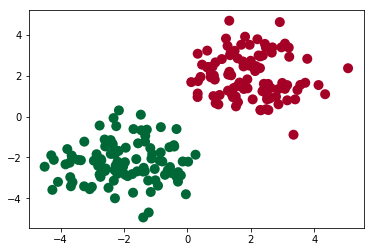

In [52]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F     # 激励函数都在这

#数据准备
n_data=torch.ones(100,2)
#shape=(100,2)
x0=torch.normal(2*n_data,1)
y0=torch.zeros(100)

x1=torch.normal(-2*n_data,1)
y1=torch.ones(100)


#合并数据
x=torch.cat((x0,x1),0).type(torch.FloatTensor)
y=torch.cat((y0,y1),).type(torch.LongTensor)
print(x.shape,y.shape)
#转换
x,y=Variable(x),Variable(y)

#绘制这些数据点

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


Sequential (
  (0): Linear (2 -> 10)
  (1): ReLU ()
  (2): Linear (10 -> 2)
)


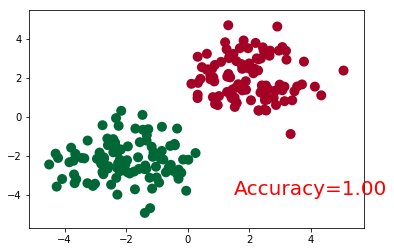

In [54]:
# 继承 torch 的 Module
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        # 继承 __init__ 功能
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        #正向传x播输入值，神经网络输出值
        x=F.relu(self.hidden(x))
        # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        x=self.out(x)
        return x
net=Net(n_feature=2,n_hidden=10,n_output=2)

#快速创建方式
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2)
)
print(net)

#训练网络
optimizer=torch.optim.SGD(net.parameters(),lr=0.02)


loss_func=torch.nn.CrossEntropyLoss()

#可视化训练过程
plt.ion()
plt.show()
for t in range(100):
    out=net(x)
    loss=loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%2==0:
        plt.cla()
        prediction=torch.max(F.softmax(out),1)[1]
        pred_y=prediction.data.numpy().squeeze()
        target_y=y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=100,lw=0,cmap='RdYlGn')
        accuracy=sum(pred_y==target_y)/200
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)


plt.ioff()  # 停止画图
plt.show()
    
    